In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

In [5]:
data = pd.read_csv('OneDrive/Desktop/india ai hackathon/train.csv')
data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [5]:
data['category'].describe()

count                      93686
unique                        15
top       Online Financial Fraud
freq                       57434
Name: category, dtype: object

In [7]:
data['category'].isnull().sum()

0

In [9]:
data['category'].value_counts().reset_index()

,category,count
0,Online Financial Fraud,57434
1,Online and Social Media Related Crime,12140
2,Any Other Cyber Crime,10878
3,Cyber Attack/ Dependent Crimes,3608
4,RapeGang Rape RGRSexually Abusive Content,2822
5,Sexually Obscene material,1838
6,Hacking Damage to computercomputer system etc,1710
7,Sexually Explicit Act,1552
8,Cryptocurrency Crime,480
9,Online Gambling Betting,444


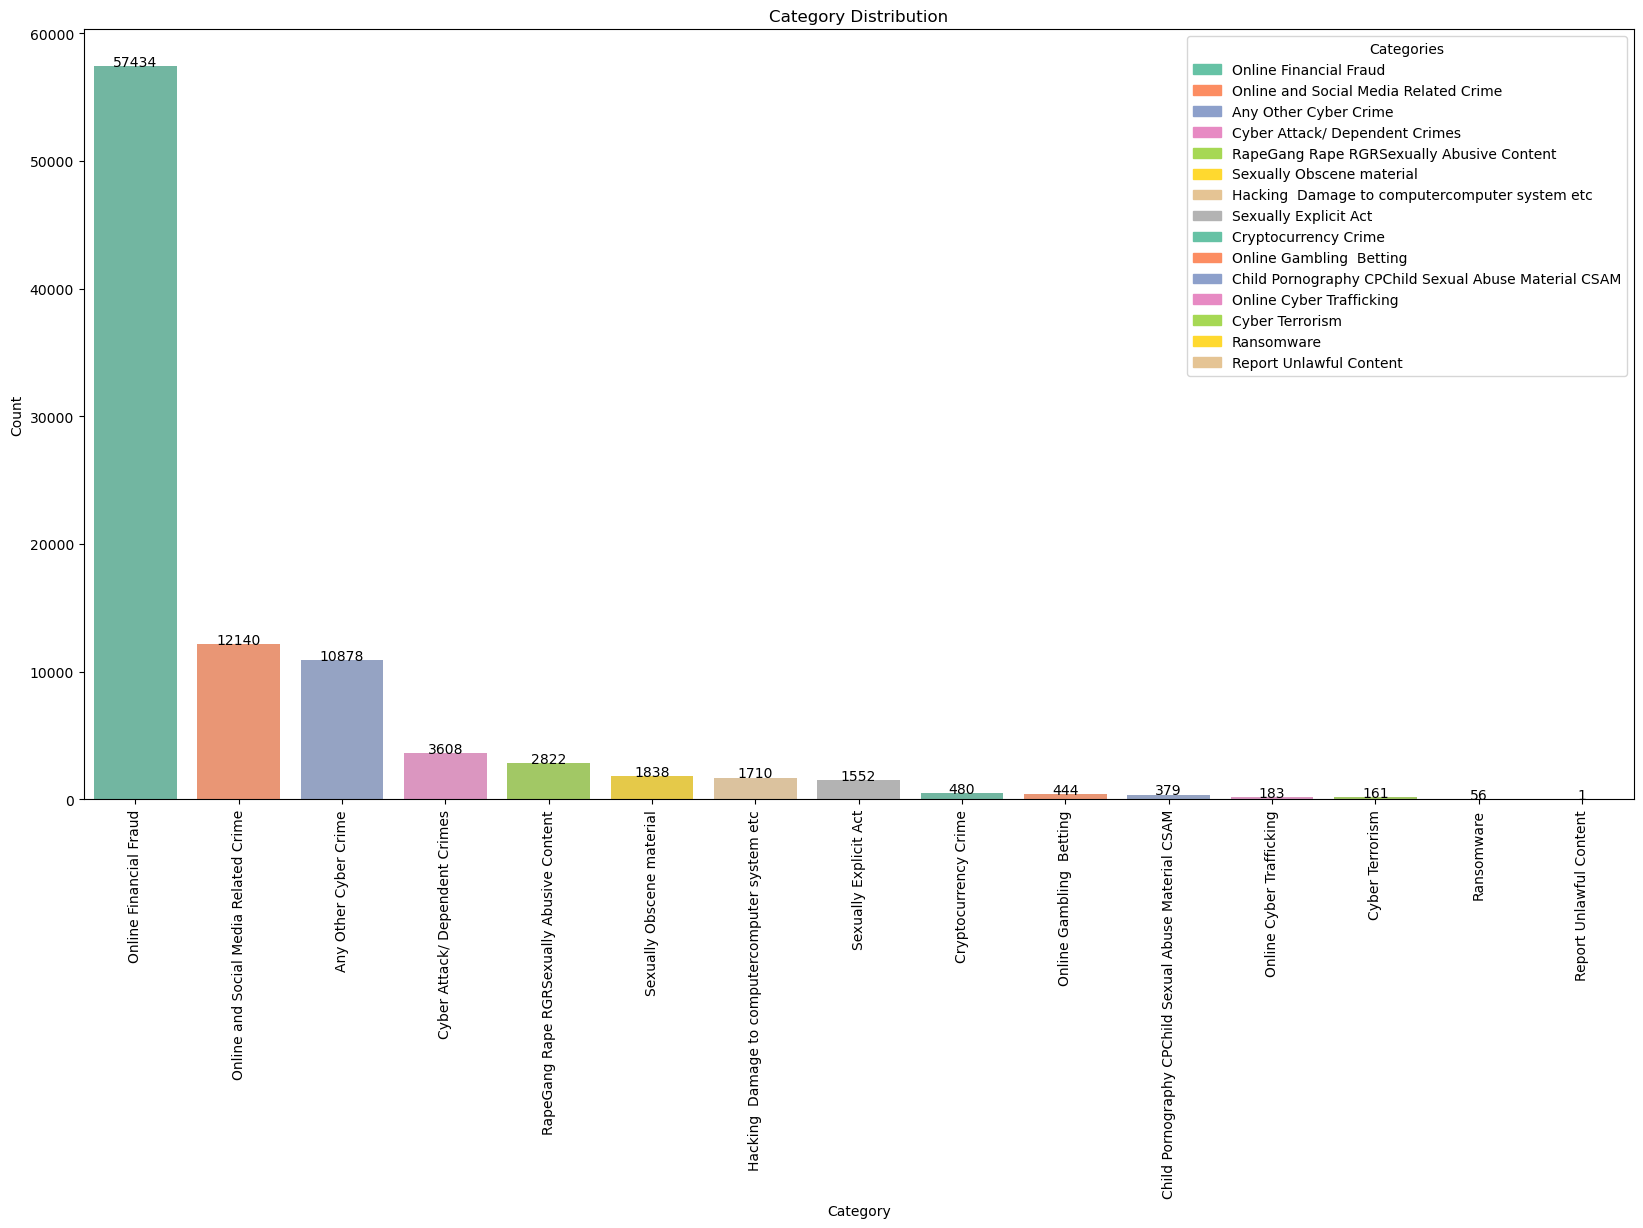

In [11]:
# Prepare the data
category_counts = data['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create a color palette with distinct colors for each category
palette = sns.color_palette('Set2', n_colors=len(category_counts))

# Create the bar plot with hue and disable the built-in legend
plt.figure(figsize=(20, 10))
sns.barplot(x='category', y='count', data=category_counts, hue='category', palette=palette, dodge=False, legend=False)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

# Rotate the category names to be vertical
plt.xticks(rotation=90)

# Display the count on top of the bars
for index, row in category_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")

# Add a legend manually for each category
legend_patches = [mpatches.Patch(color=palette[i], label=category_counts['category'][i]) for i in range(len(category_counts))]
plt.legend(handles=legend_patches, title='Categories')

# Show the plot
plt.show()

In [13]:
data['category'].value_counts(normalize=True)*100

category
Online Financial Fraud                                  61.304784
Online and Social Media Related Crime                   12.958179
Any Other Cyber Crime                                   11.611127
Cyber Attack/ Dependent Crimes                           3.851162
RapeGang Rape RGRSexually Abusive Content                3.012190
Sexually Obscene material                                1.961873
Hacking  Damage to computercomputer system etc           1.825246
Sexually Explicit Act                                    1.656598
Cryptocurrency Crime                                     0.512350
Online Gambling  Betting                                 0.473924
Child Pornography CPChild Sexual Abuse Material CSAM     0.404543
Online Cyber Trafficking                                 0.195333
Cyber Terrorism                                          0.171851
Ransomware                                               0.059774
Report Unlawful Content                                  0.001067
N

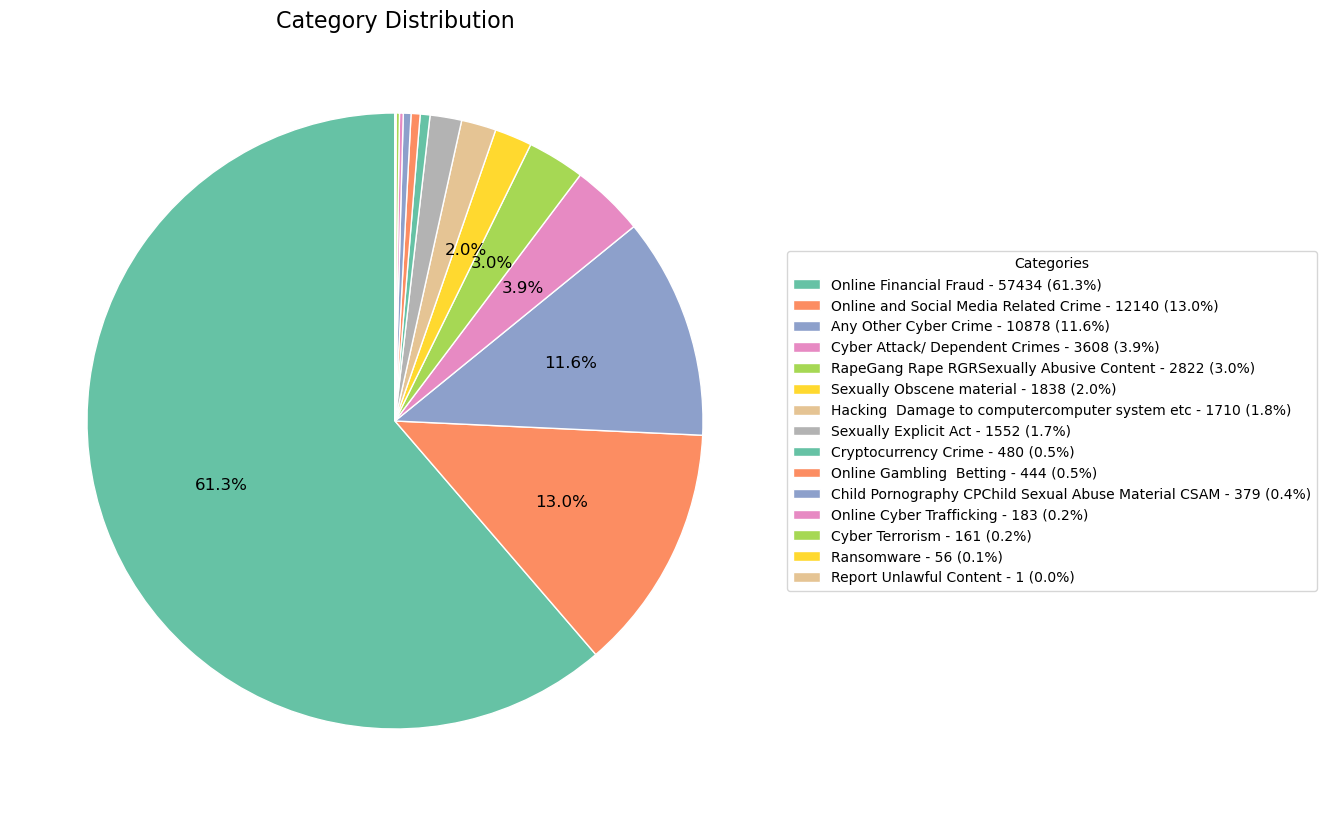

In [15]:
# Define a function to conditionally show percentages only for large slices
def autopct_function(pct):
        return ('%1.1f%%' % pct) if pct > 1.9 else ''  # Show percentage only if slice is larger than 5%

# Create the pie chart with conditional percentage labels
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(category_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # Add space between slices

# Equal aspect ratio ensures that the pie chart is a circle
plt.gca().set_aspect('equal')

# Add a title
plt.title('Category Distribution', fontsize=16)

# Add a legend with the category labels and their percentages
legend_labels = [f'{category_counts["category"][i]} - {category_counts["count"][i]} ({(category_counts["count"][i] / category_counts["count"].sum()) * 100:.1f}%)' for i in range(len(category_counts))]
plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

In [17]:
data['sub_category'].describe()

count                  87095
unique                    35
top       UPI Related Frauds
freq                   26856
Name: sub_category, dtype: object

In [19]:
data['sub_category'].isnull().sum()

6591

In [7]:
data = data.assign(sub_category=data['sub_category'].fillna('NA'))

In [23]:
data['sub_category'].value_counts().reset_index()

,sub_category,count
0,UPI Related Frauds,26856
1,Other,10878
2,DebitCredit Card FraudSim Swap Fraud,10805
3,Internet Banking Related Fraud,8872
4,NA,6591
5,Fraud CallVishing,5803
6,Cyber Bullying Stalking Sexting,4089
7,EWallet Related Fraud,4047
8,FakeImpersonating Profile,2299
9,Profile Hacking Identity Theft,2073


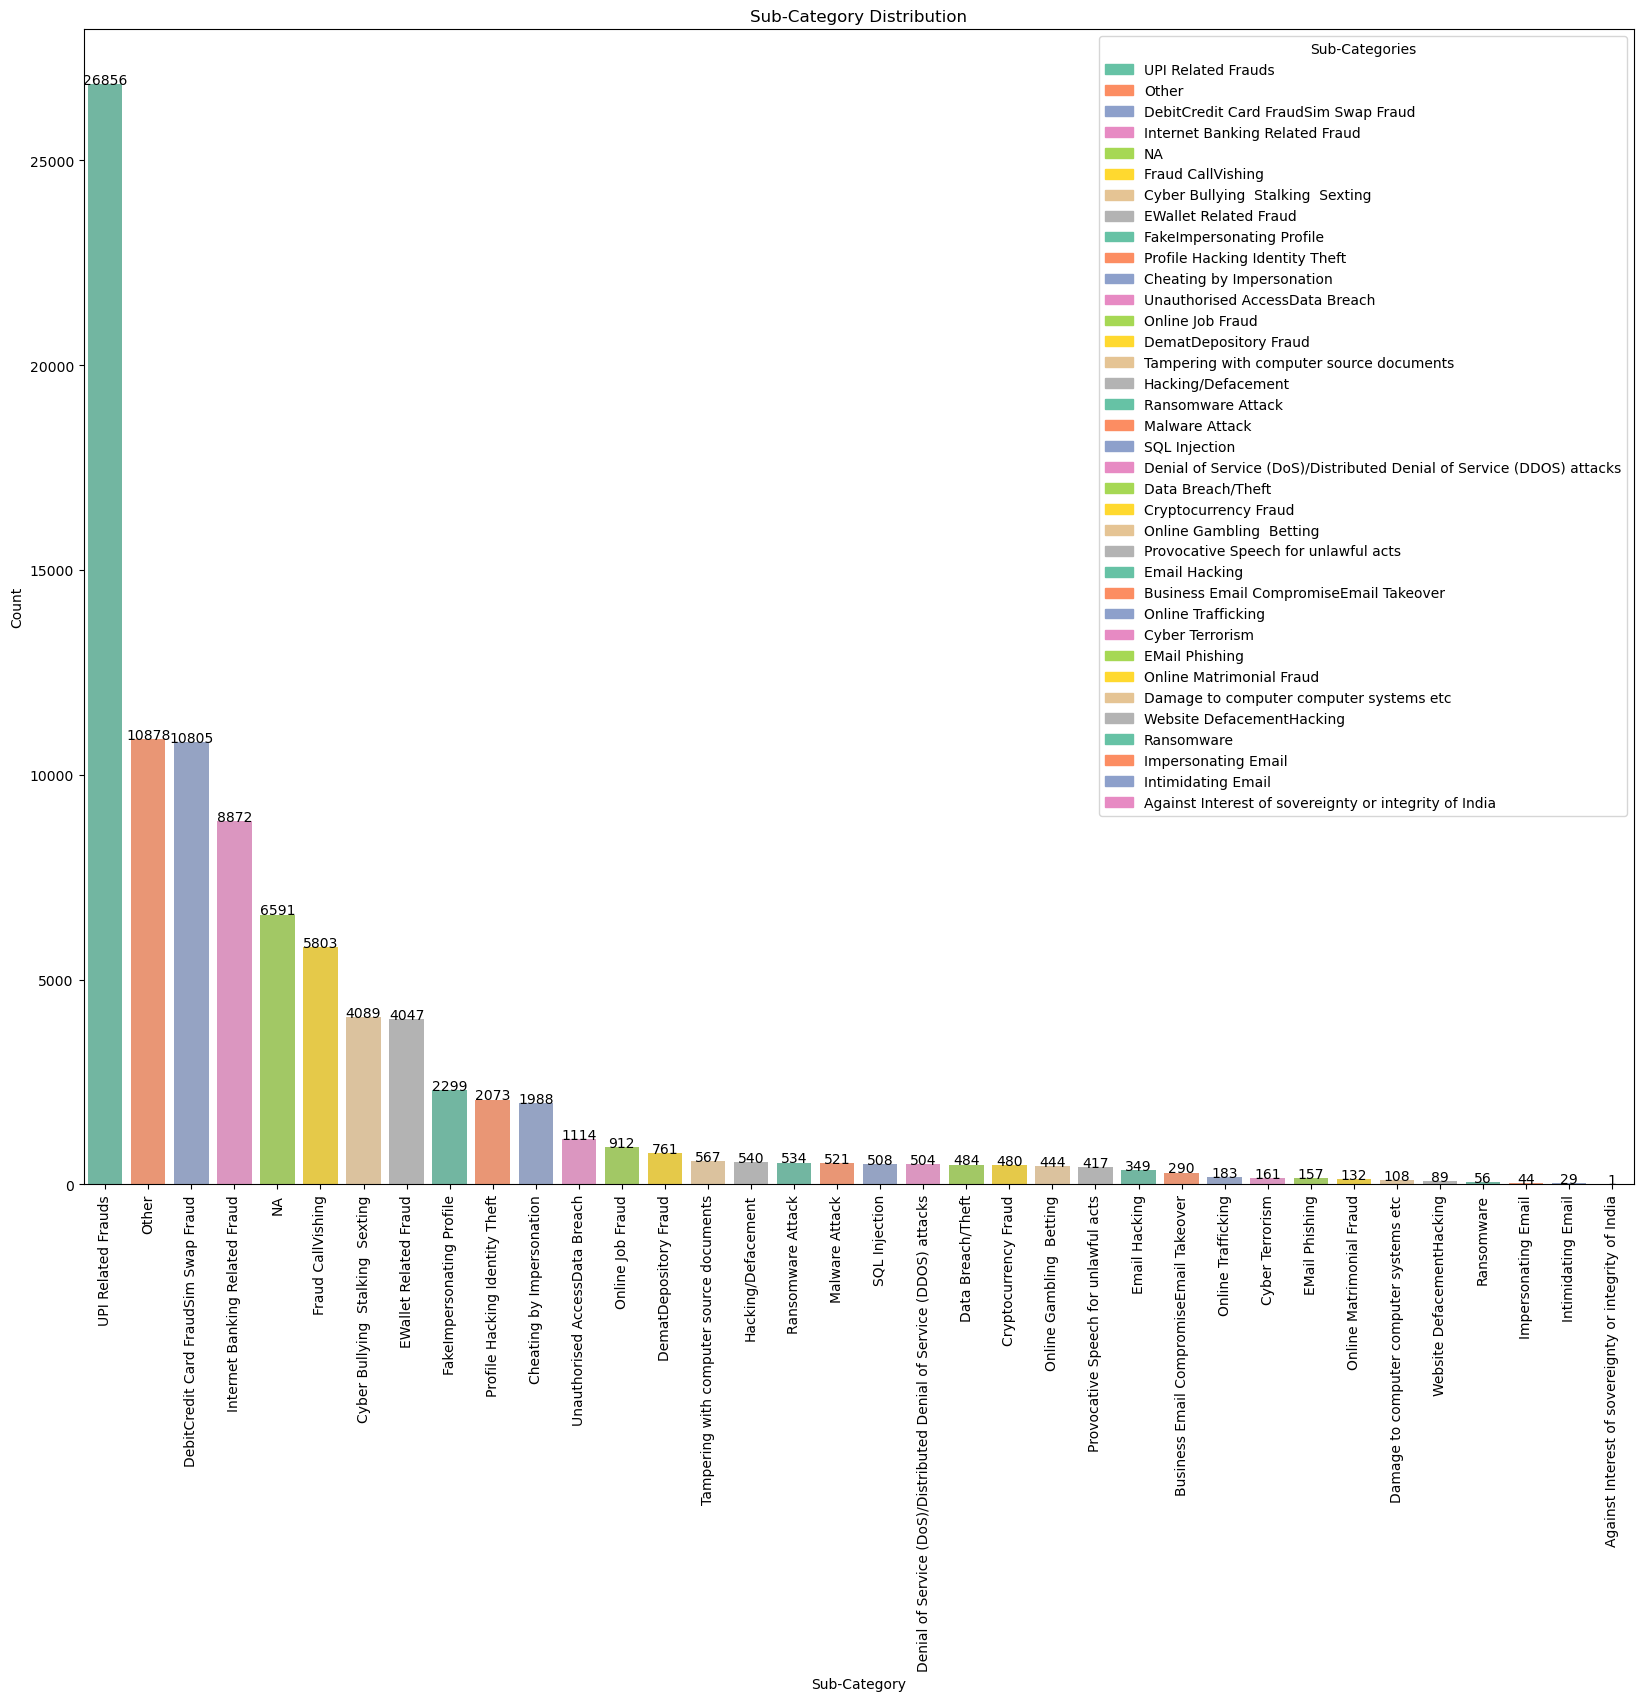

In [25]:
# Prepare the data
subcategory_counts = data['sub_category'].value_counts().reset_index()
subcategory_counts.columns = ['sub_category', 'count']

# Create a color palette with distinct colors for each category
palette = sns.color_palette('Set2', n_colors=len(subcategory_counts))

# Create the bar plot with hue and disable the built-in legend
plt.figure(figsize=(20, 15))
sns.barplot(x='sub_category', y='count', data=subcategory_counts, hue='sub_category', palette=palette, dodge=False, legend=False)


plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.title('Sub-Category Distribution')


plt.xticks(rotation=90)


for index, row in subcategory_counts.iterrows():
    plt.text(row.name, row['count'] + 0.5, row['count'], color='black', ha="center")


legend_patches = [mpatches.Patch(color=palette[i], label=subcategory_counts['sub_category'][i]) for i in range(len(subcategory_counts))]
plt.legend(handles=legend_patches, title='Sub-Categories')

# Show the plot
plt.show()

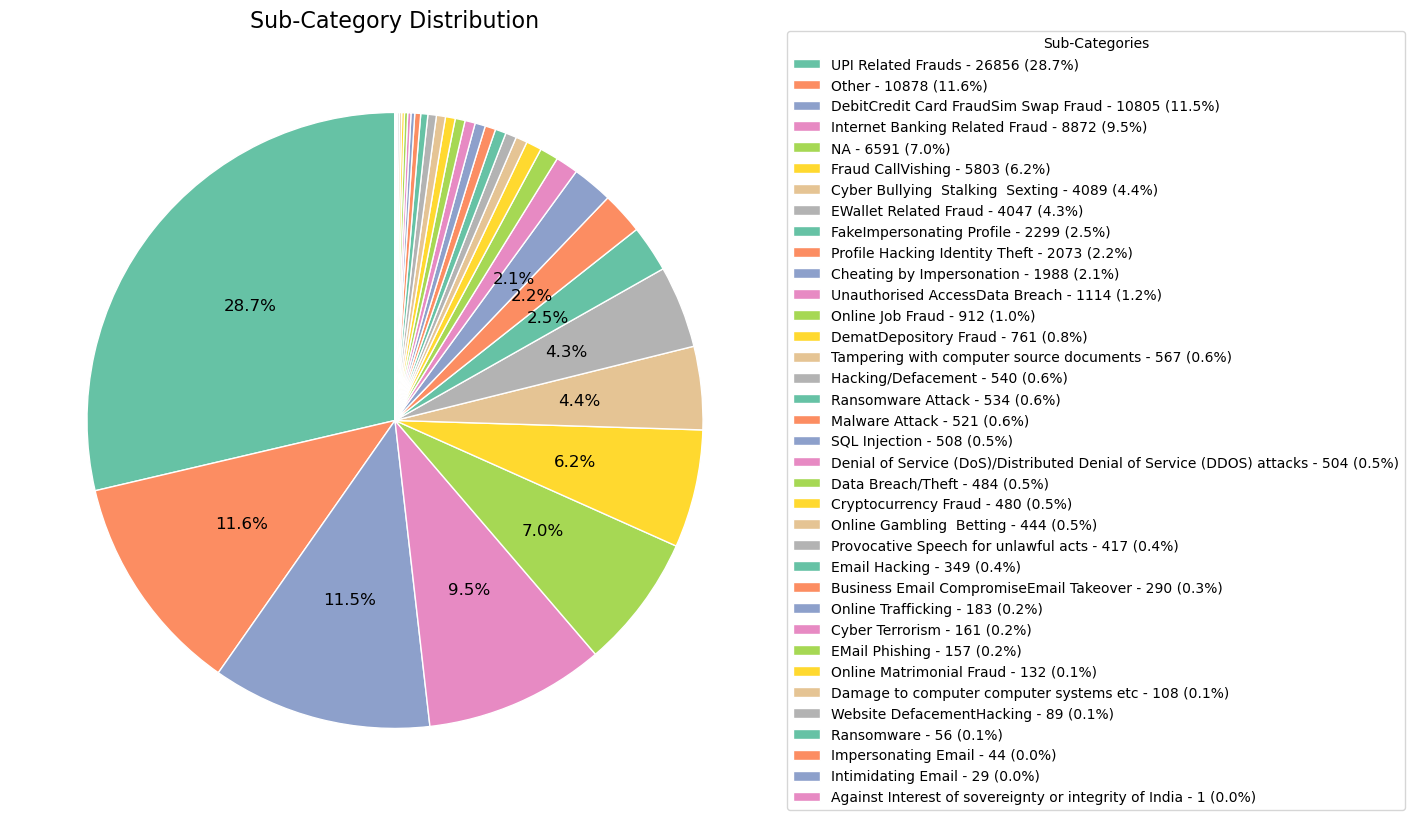

In [27]:
plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(subcategory_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # Add space between slices

# Equal aspect ratio ensures that the pie chart is a circle
plt.gca().set_aspect('equal')

# Add a title
plt.title('Sub-Category Distribution', fontsize=16)

# Add a legend with the category labels and their percentages
legend_labels = [f'{subcategory_counts["sub_category"][i]} - {subcategory_counts["count"][i]} ({(subcategory_counts["count"][i] / subcategory_counts["count"].sum()) * 100:.1f}%)' for i in range(len(subcategory_counts))]
plt.legend(wedges, legend_labels, title="Sub-Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

In [29]:
data.groupby(['category','sub_category']).count()

crimeaditionalinfo
category                                           sub_category                                                          
Any Other Cyber Crime                              Other                                                            10877
Child Pornography CPChild Sexual Abuse Material... NA                                                                 379
Cryptocurrency Crime                               Cryptocurrency Fraud                                               480
Cyber Attack/ Dependent Crimes                     Data Breach/Theft                                                  484
                                                   Denial of Service (DoS)/Distributed Denial of S...                 504
                                                   Hacking/Defacement                                                 540
                                                   Malware Attack                                                     521
                                                   Ransomware Attack                                                  534
                                                   SQL Injection                                                      508
                                                   Tampering with computer source documents                           517
Cyber Terrorism                                    Cyber Terrorism                                                    161
Hacking  Damage to computercomputer system etc     Damage to computer computer systems etc                            108
                                                   Email Hacking                                                      349
                                                   Tampering with computer source documents                            50
                                                   Unauthorised AccessData Breach                                    1114
                                                   Website DefacementHacking                                           89
Online Cyber Trafficking                           Online Trafficking                                                 183
Online Financial Fraud                             Business Email CompromiseEmail Takeover                            290
                                                   DebitCredit Card FraudSim Swap Fraud                             10802
                                                   DematDepository Fraud                                              761
                                                   EWallet Related Fraud                                             4047
                                                   Fraud CallVishing                                                 5802
                                                   Internet Banking Related Fraud                                    8871
                                                   UPI Related Frauds                                               26843
Online Gambling  Betting                           Online Gambling  Betting                                           444
Online and Social Media Related Crime              Cheating by Impersonation                                         1987
                                                   Cyber Bullying  Stalking  Sexting                                 4089
                                                   EMail Phishing                                                     157
                                                   FakeImpersonating Profile                                         2299
                                                   Impersonating Email                                                 44
                                                   Intimidating Email                                                  29
                                                   Online Job Fraud          

In [31]:
# Analyze unique subcategories per category
category_subcategory_pairs = data.groupby('category')['sub_category'].nunique()

# Identify subcategories that belong to multiple categories
subcategory_to_categories = data.groupby('sub_category')['category'].nunique()
subcategories_multiple_categories = subcategory_to_categories[subcategory_to_categories > 1]

# Summarize results
category_subcategory_pairs, subcategories_multiple_categories


(category
 Any Other Cyber Crime                                    1
 Child Pornography CPChild Sexual Abuse Material CSAM     1
 Cryptocurrency Crime                                     1
 Cyber Attack/ Dependent Crimes                           7
 Cyber Terrorism                                          1
 Hacking  Damage to computercomputer system etc           5
 Online Cyber Trafficking                                 1
 Online Financial Fraud                                   7
 Online Gambling  Betting                                 1
 Online and Social Media Related Crime                   10
 Ransomware                                               1
 RapeGang Rape RGRSexually Abusive Content                1
 Report Unlawful Content                                  1
 Sexually Explicit Act                                    1
 Sexually Obscene material                                1
 Name: sub_category, dtype: int64,
 sub_category
 NA                                      

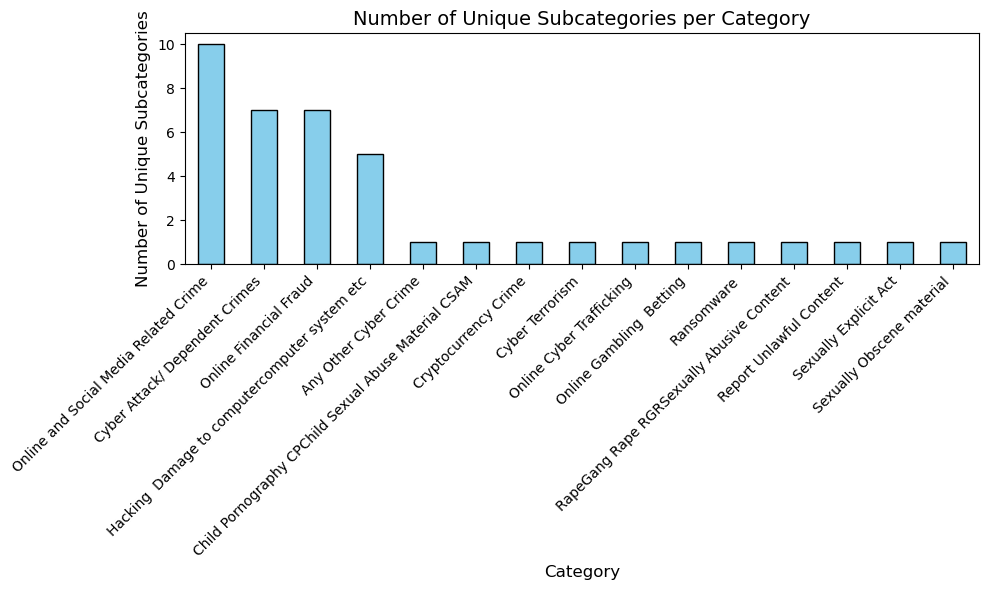

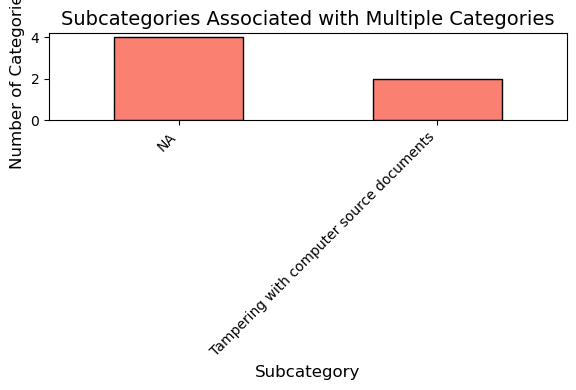

In [35]:
category_subcategory_pairs = data.groupby('category')['sub_category'].nunique()


subcategory_to_categories = data.groupby('sub_category')['category'].nunique()
subcategories_multiple_categories = subcategory_to_categories[subcategory_to_categories > 1]


plt.figure(figsize=(10, 6))
category_subcategory_pairs.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Unique Subcategories per Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Unique Subcategories', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


if not subcategories_multiple_categories.empty:
    plt.figure(figsize=(6, 4))
    subcategories_multiple_categories.sort_values(ascending=False).plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Subcategories Associated with Multiple Categories', fontsize=14)
    plt.xlabel('Subcategory', fontsize=12)
    plt.ylabel('Number of Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No subcategories are associated with multiple categories.")

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    if isinstance(text, str):  
        tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return ' '.join(tokens)
    return ''


data['processed_info'] = data['crimeaditionalinfo'].fillna('').apply(preprocess_text)


category_texts = data.groupby('category')['processed_info'].apply(lambda x: ' '.join(x))


tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
tfidf_matrix = tfidf_vectorizer.fit_transform(category_texts)


tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=category_texts.index, columns=tfidf_vectorizer.get_feature_names_out())


top_words_per_category = {}
for category, row in tfidf_df.iterrows():
    top_words = row.nlargest(5).index.tolist()
    top_words_per_category[category] = top_words


for category, words in top_words_per_category.items():
    print(f"Category: {category}")
    print(f"  Top Words: {', '.join(words)}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Category: Any Other Cyber Crime
  Top Words: number, money, loan, call, rs
Category: Child Pornography CPChild Sexual Abuse Material CSAM
  Top Words: please, sir, call, video, help
Category: Cryptocurrency Crime
  Top Words: money, app, invested, amount, account
Category: Cyber Attack/ Dependent Crimes
  Top Words: stange, even, everything, like, anymore
Category: Cyber Terrorism
  Top Words: loan, number, app, call, money
Category: Hacking  Damage to computercomputer system etc
  Top Words: loan, account, hai, help, contact
Category: Online Cyber Trafficking
  Top Words: number, call, money, please, sir
Category: Online Financial Fraud
  Top Words: amount, account, bank, fraud, total
Category: Online Gambling  Betting
  Top Words: money, please, sir, amount, number
Category: Online and Social Media Related Crime
  Top Words: number, video, account, call, money
Category: Ransomware
  Top Words: data, please, file, email, help
Category: RapeGang Rape RGRSexually Abusive Content
  Top W

In [9]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
import string
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    if isinstance(text, str): 
        tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return tokens
    return []


data['processed_info'] = data['crimeaditionalinfo'].fillna('').apply(preprocess_text)


category_texts = data.groupby('category')['processed_info'].apply(lambda x: [word for tokens in x for word in tokens])


top_words_per_category = {}
for category, texts in category_texts.items():
    
    dictionary = Dictionary([texts])
    corpus = [dictionary.doc2bow(texts)]
    
    
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, random_state=42)
    
    
    topics = lda_model.print_topics(num_words=5)
    top_words_per_category[category] = {f"Topic {i+1}": topic for i, topic in enumerate(topics)}


for category, topics in top_words_per_category.items():
    print(f"Category: {category}")
    for topic_name, words in topics.items():
        print(f"  {topic_name}: {words}")
    print()


ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\arjun\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)

In [20]:
pip install scipy==1.9.3


     ---------------------------------------- 0.0/42.1 MB ? eta -:--:--
     --------------------------------------- 0.0/42.1 MB 682.7 kB/s eta 0:01:02
     --------------------------------------- 0.1/42.1 MB 825.8 kB/s eta 0:00:51
      --------------------------------------- 0.6/42.1 MB 4.4 MB/s eta 0:00:10
     --- ------------------------------------ 3.5/42.1 MB 20.2 MB/s eta 0:00:02
     ------ --------------------------------- 6.6/42.1 MB 32.4 MB/s eta 0:00:02
     ------- -------------------------------- 8.4/42.1 MB 31.6 MB/s eta 0:00:02
     ---------- ---------------------------- 10.9/42.1 MB 54.7 MB/s eta 0:00:01
     ------------ -------------------------- 13.8/42.1 MB 54.7 MB/s eta 0:00:01
     ------------- ------------------------- 14.8/42.1 MB 54.7 MB/s eta 0:00:01
     ----------------- --------------------- 19.0/42.1 MB 65.6 MB/s eta 0:00:01
     ---------------------- --------------- 25.0/42.1 MB 162.4 MB/s eta 0:00:01
     -------------------------- ----------- 29.7/

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [44 lines of output]
  + meson setup C:\Users\arjun\AppData\Local\Temp\pip-install-7infib6h\scipy_e5ec2a542a3f42da982a0eb4c14581b3 C:\Users\arjun\AppData\Local\Temp\pip-install-7infib6h\scipy_e5ec2a542a3f42da982a0eb4c14581b3\.mesonpy-wi3gk_hi -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\arjun\AppData\Local\Temp\pip-install-7infib6h\scipy_e5ec2a542a3f42da982a0eb4c14581b3\.mesonpy-wi3gk_hi\meson-python-native-file.ini
  The Meson build system
  Version: 1.6.0
  Source dir: C:\Users\arjun\AppData\Local\Temp\pip-install-7infib6h\scipy_e5ec2a542a3f42da982a0eb4c14581b3
  Build dir: C:\Users\arjun\AppData\Local\Temp\pip-install-7infib6h\scipy_e5ec2a542a3f42da982a0eb4c14581b3\.mesonpy-wi3gk_hi
  Build type: native build
  Project name: SciPy
  Project version: 1.9.3
  C compiler for the host machine: gcc (gcc 6.3.0 "gcc (MinGW.org GCC-6.3

In [11]:
pip install scipy --only-binary=:all:


Note: you may need to restart the kernel to use updated packages.
